In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# from rwordcloud import WordCloud

In [2]:
CAVideos_path = "data/CAvideos.csv"
GBVideos_path = "data/GBvideos.csv"
FRVideos_path = "data/FRvideos.csv"
DEVideos_path = "data/DEvideos.csv"
cavideos = pd.read_csv(CAVideos_path)
gbvideos = pd.read_csv(GBVideos_path)
frvideos = pd.read_csv(FRVideos_path)
devideos = pd.read_csv(DEVideos_path)

### Combine all videos

In [3]:
videos_df = pd.DataFrame(cavideos)
videos_df = videos_df.append(gbvideos)
videos_df = videos_df.append(frvideos)
videos_df = videos_df.append(devideos)
# videos_df.drop_duplicates("video_id", inplace=True)
videos_df.set_index("video_id", inplace= True)
videos_df.head(1)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
video_id,,,,,,,,,,,,,,,
n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...


### Convert date columns

In [76]:
videos_df.trending_date =  pd.to_datetime(videos_df.trending_date, format="%y.%d.%m", utc=True)
videos_df.publish_time = pd.to_datetime(videos_df.publish_time)

### Correlation 

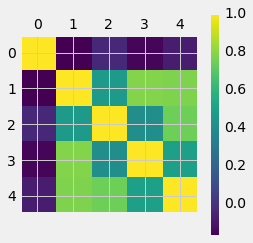

In [77]:
# category_id, likes, views, dislikes and comment_count
statColumns = ["category_id", "likes", "dislikes", "views", "comment_count"]
plt.matshow(videos_df[statColumns].corr(),)
plt.colorbar()

In [78]:
videos_df[statColumns].corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,category_id,likes,dislikes,views,comment_count
category_id,1,-0.17,-0.037,-0.15,-0.078
likes,-0.17,1,0.46,0.78,0.77
dislikes,-0.037,0.46,1,0.41,0.74
views,-0.15,0.78,0.41,1,0.49
comment_count,-0.078,0.77,0.74,0.49,1


We can see that between views & likes and views % comment_count we have a high correlation, I thought that we will have a similar correlation between views and dislikes, but is almost half of the like correlation.
Most…

### Most viewed videos

In [79]:
videos_df[['title', 'views']].sort_values(by= 'views', ascending=False).head()

,title,views
video_id,,
_I_D_8Z4sJE,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,424538912
_I_D_8Z4sJE,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,413586699
_I_D_8Z4sJE,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,402650804
_I_D_8Z4sJE,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,392036878
_I_D_8Z4sJE,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,382401497


### Most liked viedeos

In [80]:
videos_df[['title', 'likes']].sort_values(by= 'likes', ascending=False).head()

,title,likes
video_id,,
7C2z4GqqS5E,BTS (방탄소년단) 'FAKE LOVE' Official MV,5613827
7C2z4GqqS5E,BTS (방탄소년단) 'FAKE LOVE' Official MV,5595203
7C2z4GqqS5E,BTS (방탄소년단) 'FAKE LOVE' Official MV,5530568
7C2z4GqqS5E,BTS (방탄소년단) 'FAKE LOVE' Official MV,5486349
VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,5444541


### Most commented videos

In [81]:
videos_df[['title', 'comment_count']].sort_values(by= 'comment_count', ascending=False).head()

,title,comment_count
video_id,,
QwZT7T-TXT0,So Sorry.,1626501
QwZT7T-TXT0,So Sorry.,1606178
QwZT7T-TXT0,So Sorry.,1588337
QwZT7T-TXT0,So Sorry.,1562312
QwZT7T-TXT0,So Sorry.,1534873


### Most disliked videos

In [82]:
videos_df[['title', 'dislikes']].sort_values(by= 'dislikes', ascending=False).head()

,title,dislikes
video_id,,
QwZT7T-TXT0,So Sorry.,1944971
QwZT7T-TXT0,So Sorry.,1928677
QwZT7T-TXT0,So Sorry.,1911836
QwZT7T-TXT0,So Sorry.,1890743
QwZT7T-TXT0,So Sorry.,1868756


### Top Category ID

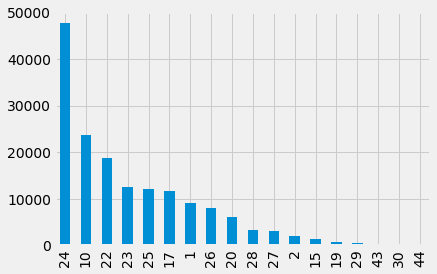

In [83]:
top_category = videos_df['category_id'].value_counts().sort_values(ascending=False)
# plt.figure(figsize=(20, 10))
# plt.xticks(top_category.index, labels=top_category)
# plt.bar(x=top_category.index, height=top_category.values)

plt.style.use('fivethirtyeight') 
top_category.plot.bar()
# plt.xticks(rotation=0)

### Top trending Channels in all countries


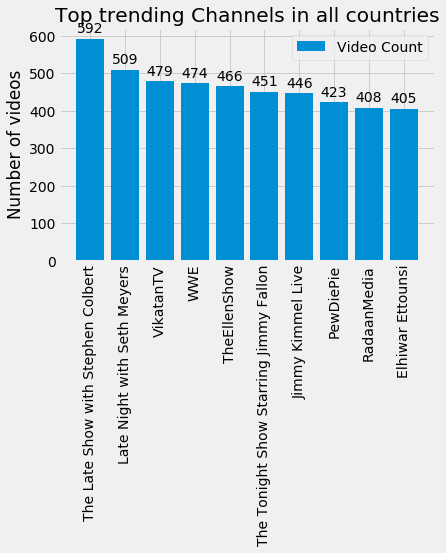

In [84]:
top10Channels = videos_df["channel_title"].value_counts().sort_values(ascending = False).head(10)
fig, ax = plt.subplots()
rects = ax.bar(x=top10Channels.index, height=top10Channels.values, label = "Video Count")#, color = ['r', 'b'])

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


ax.legend()
autolabel(rects)
ax.set_title("Top trending Channels in all countries")
ax.set_ylabel("Number of videos")
# plt.figure(figsize=(200,200))
plt.xticks(rotation = 90)
plt.style.use('fivethirtyeight') 
plt.show()



<BarContainer object of 10 artists>

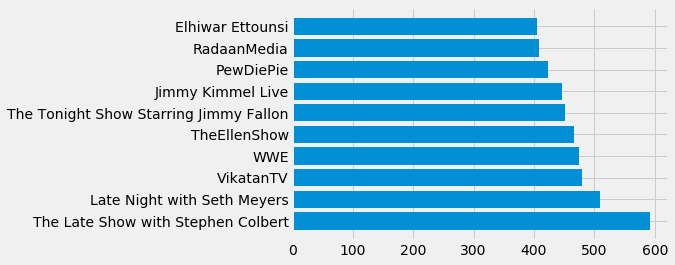

In [85]:
plt.barh(top10Channels.index, width=top10Channels.values)

### Top title bigrams

In [86]:
# for title in videos_df["title"]:
    
bigrams = [b for l in videos_df['title'] for b in zip(l.split(" ")[:-1], l.split(" ")[1:])]

In [87]:
bigram_counts = pd.Series(bigrams).apply(lambda t : t[0] + " " + t[1]).value_counts().sort_values(ascending = False).head(10)

<BarContainer object of 10 artists>

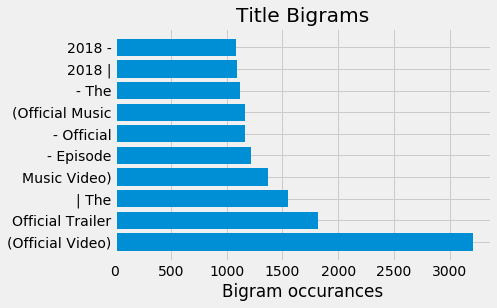

In [88]:
fig, ax = plt.subplots()
ax.set_title("Title Bigrams")
ax.set_xlabel("Bigram occurances")
ax.barh(bigram_counts.index, bigram_counts.values)

There are mainly bigrams related to music.

### How much time passes between published and trending?

In [128]:

time_passed = (videos_df.trending_date - videos_df.publish_time).sort_values(ascending=False)


In [129]:
def filter_30(t):
    if(t.days < 30 and t.days > 0):
        return t.days
    
time_day_freq = time_passed.apply(filter_30).dropna().value_counts()



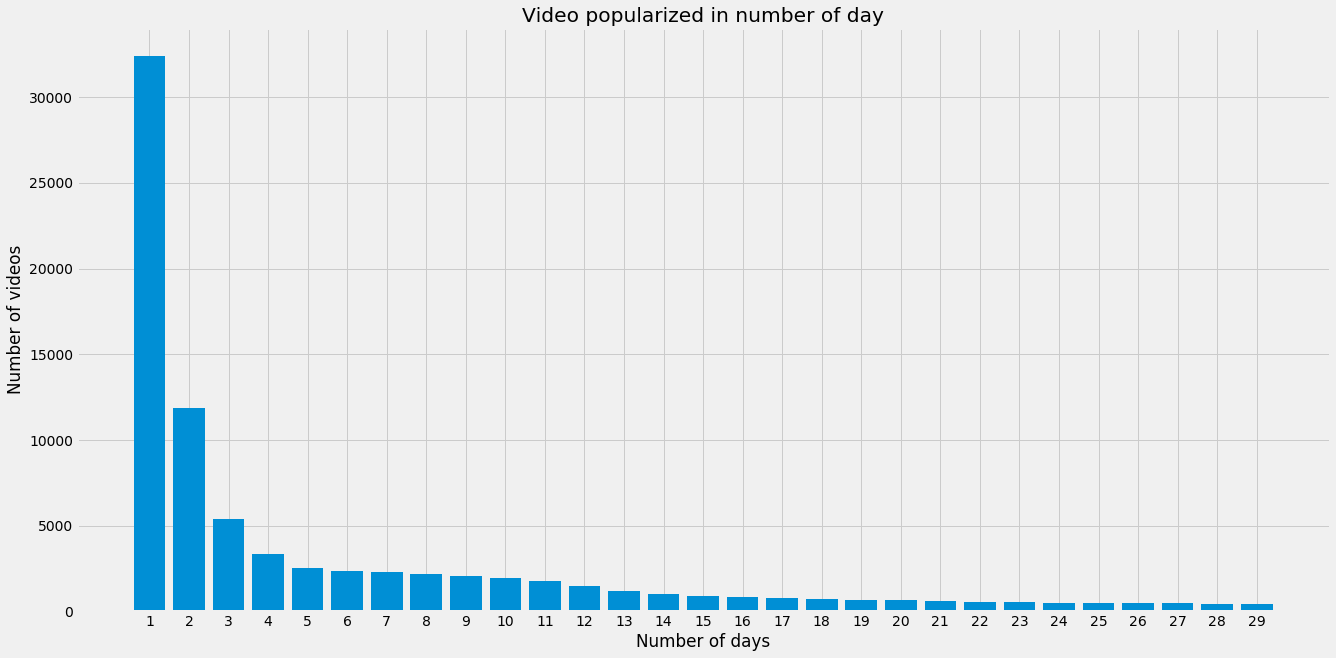

In [150]:
plt.figure(figsize=(20,10))
plt.bar(time_day_freq.index, height=time_day_freq, width= 0.8)
plt.xticks(time_day_freq.index,rotation = 0)
plt.xlabel("Number of days")
plt.ylabel("Number of videos")
plt.title("Video popularized in number of day")
plt.show()

Looking at the bar plot we can say that most of the videos popularized after a day of publish.

### The relation between views and likes

In [4]:

unique_videos = videos_df.reset_index()
unique_videos = unique_videos.drop_duplicates("video_id")

In [172]:
shape

(75894, 16)

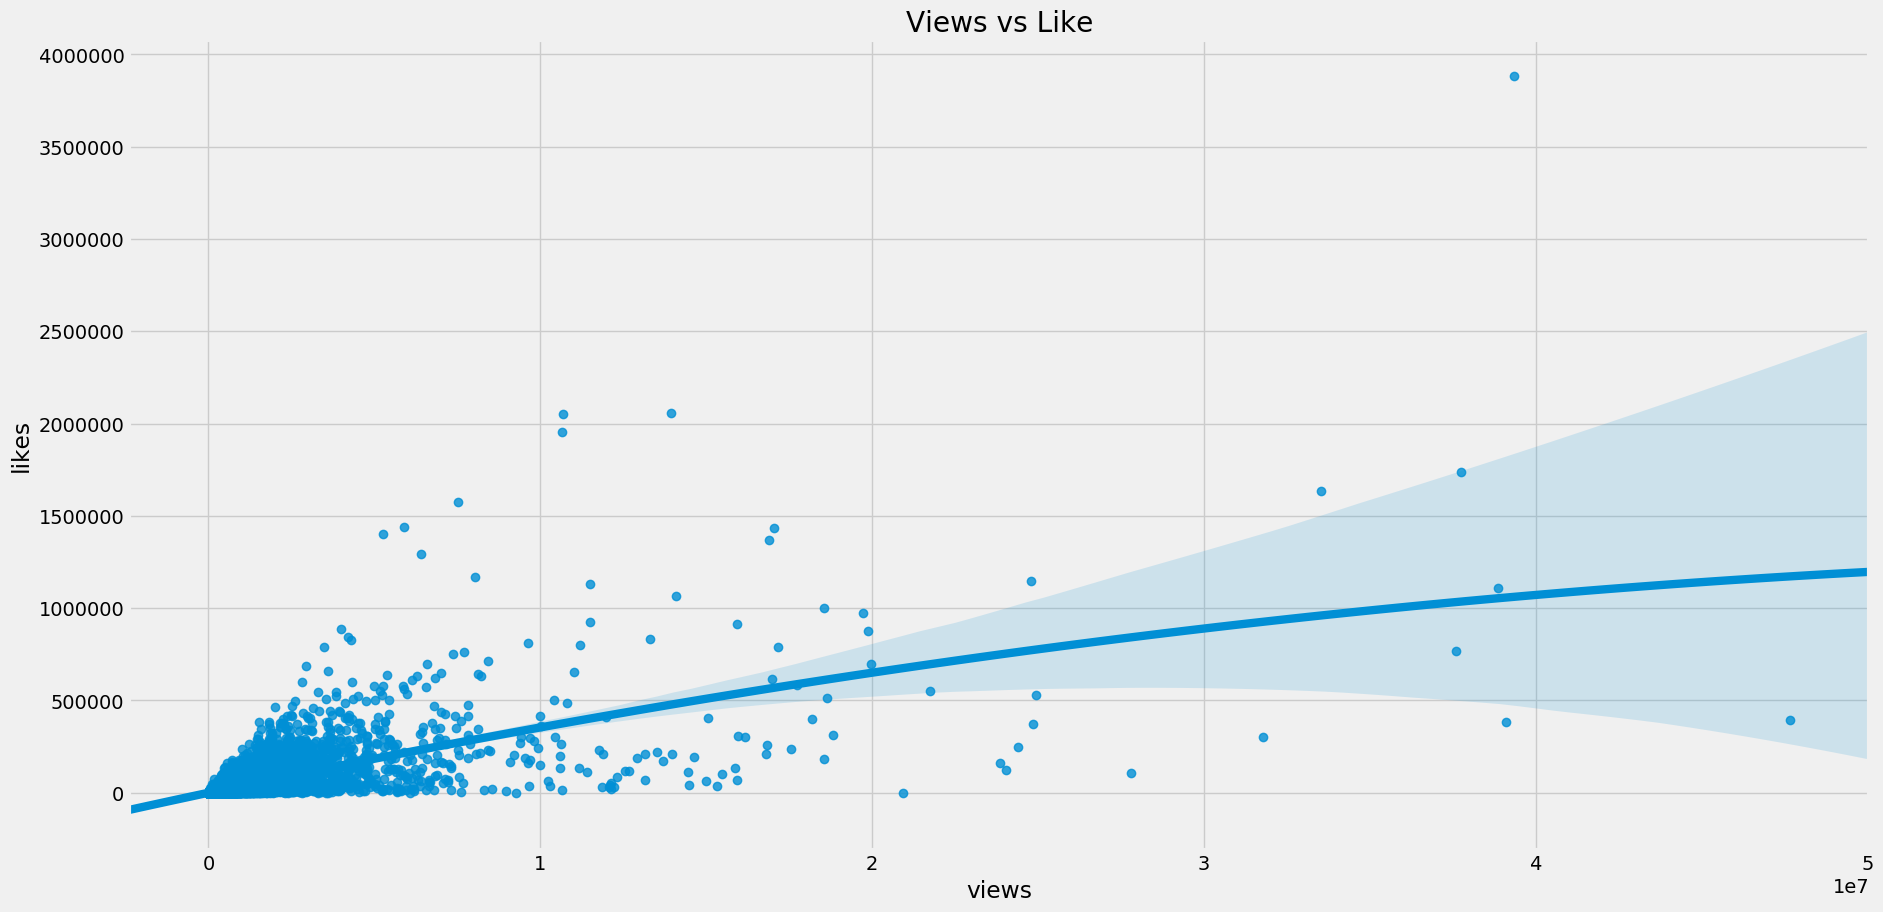

In [188]:
plt.figure(figsize=(20,10))
plt.style.use('fivethirtyeight')
sns.regplot(x="views", y="likes", data=unique_videos, order=2)
plt.title("Views vs Like")
plt.show()


### Views vs Comments

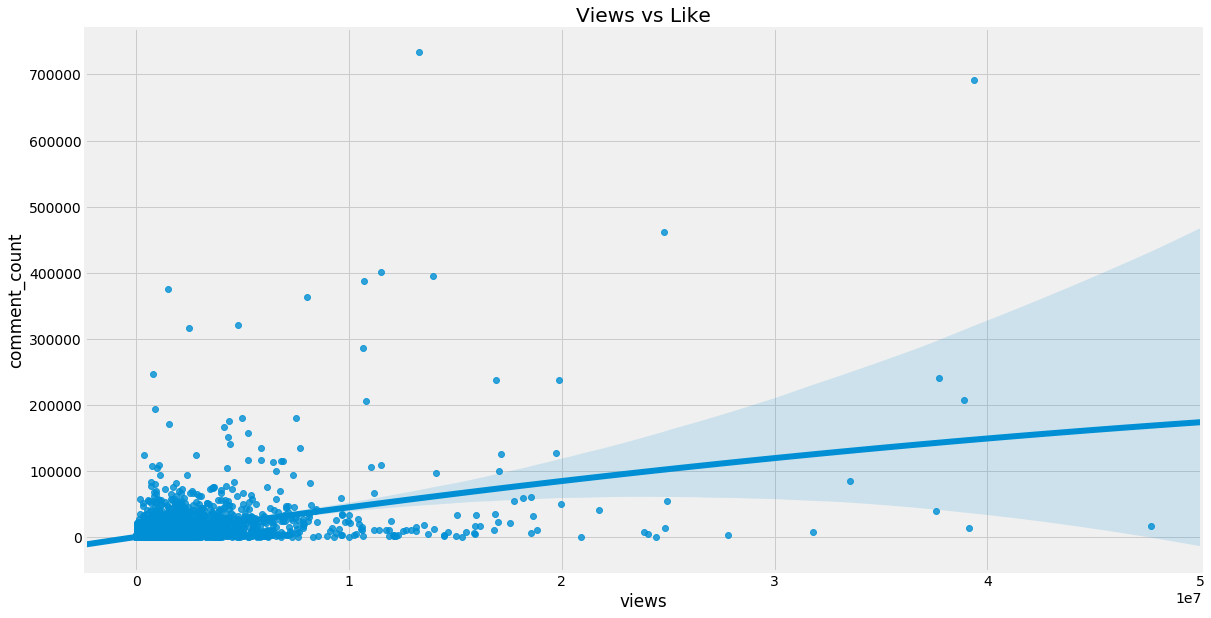

In [6]:
plt.figure(figsize=(20,10))
plt.style.use('fivethirtyeight')
sns.regplot(x="views", y="comment_count", data=unique_videos, order=2)
plt.title("Views vs Like")
plt.show()